# **Introduction**

The analysis was conducted by using the comprehensive `dataset_for_datascience_assignment.csv`, which comprises 21,982 individual customer records of 59 countries. This report presents findings that identify Danish web platform users as a statistically significant segment with substantial revenue growth potential.

Through statistical analysis, we have isolated this demographic as a high-value target for strategic business development. My hypothesis is that `web` platform users from Denmark could provide more revenue if targeted.

Initial data analysis reveals that three primary markets—Finland (FIN), Denmark (DNK), and Greece (GRC)—constitute over 95% of the user registration base, providing a clear focus for our strategic assessment.

## *Executive Summary*

My analysis identifies web platform users as a high-value customer segment with significant revenue potential, albeit characterized by extended inter-purchase intervals. The data indicates an opportunity to optimize conversion metrics by reducing these intervals. Furthermore, we observed a negative correlation suggesting that customers who convert more quickly post-registration tend to generate higher lifetime purchase volumes.

Cross-market analysis reveals that Danish consumers uniquely prefer the web platform over Android, contrary to trends in other markets. Using the Danish consumers data we have arrived at the conclusion that `web` users can be a rather profitable group. Wolt can and should incentivize `web` users from other countries to purchase more frequently to expand revenue.

## *Narrowing the Scope*

Before proceeding, we will examine the main countries in which most of the registered users are concentrated. The below plot demonstrates that Finland, Denmark, and Greece collectively represent 97.3% of the registered user base, providing statistical validity to our market-specific conclusions.

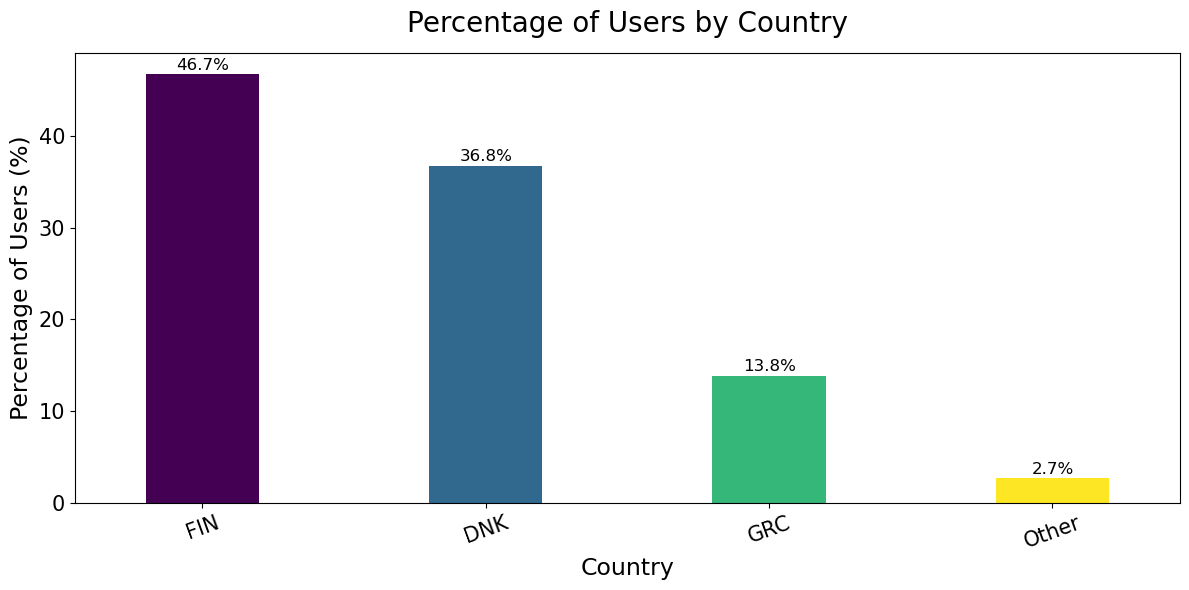

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from parsing import loadCsvData, findPath

# set which countries should supposedly be majority
validCountries = ["FIN", "DNK", "GRC"]

# load dataframe not parsed
df: pd.DataFrame = loadCsvData(findPath())

# copy dataframe
dfCopy = df.copy()

# join all other countries that are not in validCountries
dfCopy.loc[~dfCopy['REGISTRATION_COUNTRY'].isin(validCountries), \
		'REGISTRATION_COUNTRY'] = 'Other'

# count users by country and convert to percentages
countryCounts = dfCopy['REGISTRATION_COUNTRY'].value_counts()
countryPercentages = countryCounts / countryCounts.sum() * 100

# sort values
countryPercentages = countryPercentages.sort_values(ascending=False)

# plot
plt.figure(figsize=(12,6))
countryPercentages.plot(kind='bar', width=0.4, color=plt.cm.viridis(np.linspace(0, 1, len(countryPercentages))))
plt.title('Percentage of Users by Country', fontsize=20, pad=15)
plt.xlabel('Country', fontsize=17)
plt.ylabel('Percentage of Users (%)', fontsize=17)
plt.xticks(rotation=20, size=15)
plt.yticks(size=15)

# Add percentage labels on top of each bar
for i, v in enumerate(countryPercentages):
    plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', fontsize=12)

plt.tight_layout()
plt.show() 

## *Platform Utilization Analysis*

Among all registered clients, web platform seems to be less preferred overall and in percentage of users. However, if you only consider this and assume that "we should focus on the predominant platforms", you could not be more wrong.

The group of users that prefer to use the web platform are what the gaming industry calls as [whales](https://www.blog.udonis.co/mobile-marketing/mobile-games/mobile-games-whales). They are a group that spend more money than other platform users, and in the long term too.

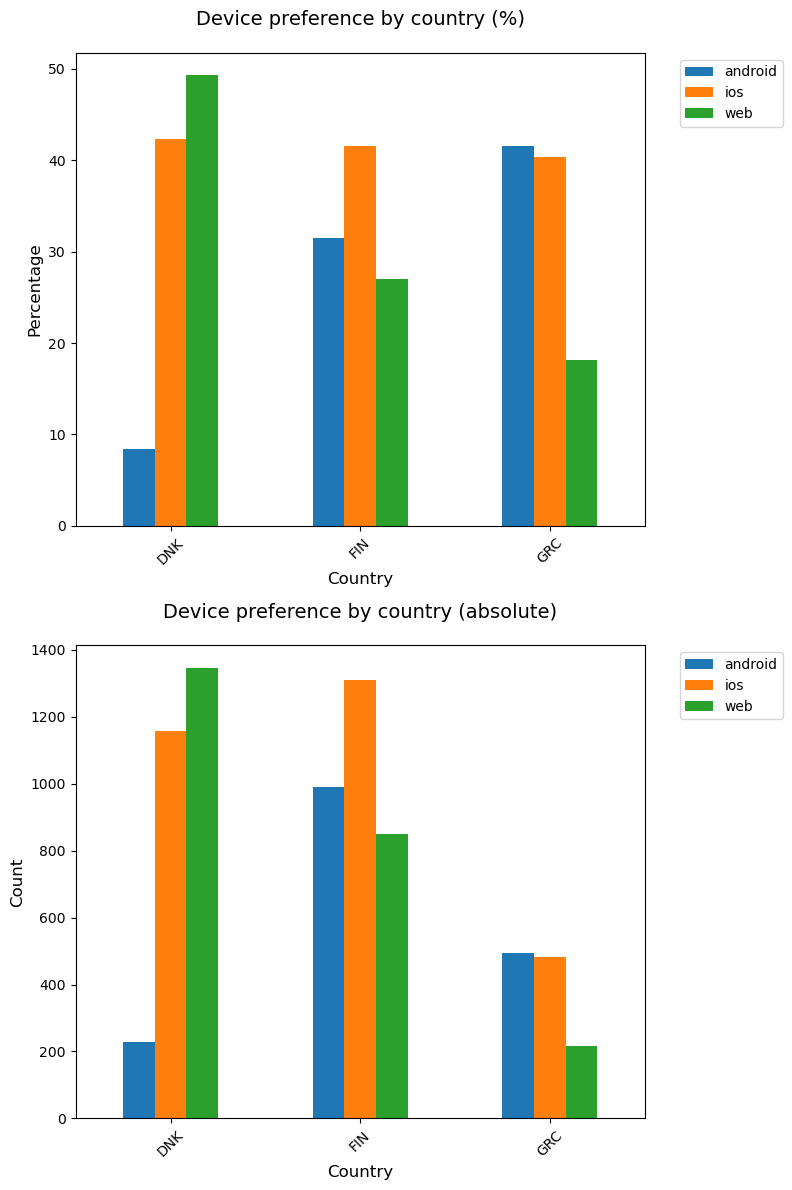

In [2]:
from parsing import parseDf
from osCountry import osPlot

# plot users OS by country
df = parseDf()
osPlot(df)

## *Web Platform User Purchase Behavior*

In average, be it mean or median values, web users are as profitable group as iOS or Android users. That is true within maximum and minimum values that they spend.

In other words, web users spend as much or more money in their smallest and biggest purchases compared to other platforms. Not only this group can purchase more, but they are faster to make their first purchase after registration.

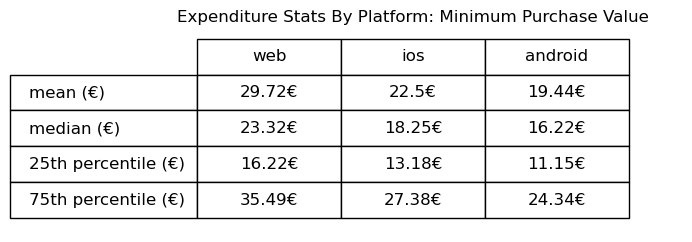

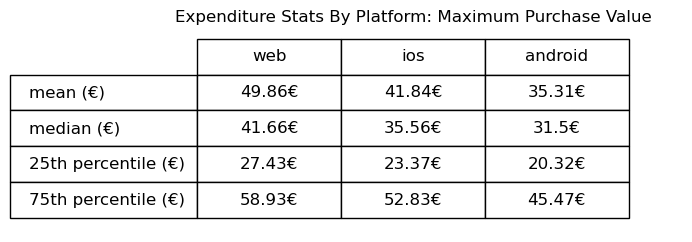

In [3]:
from osSpending import minMaxPurchase, plotPurchaseTable
from parsing import parseDf

df = parseDf()

# Uncomment one of two lines to see 
# minMaxPurchase(df, "min")
# minMaxPurchase(df, "max")

# Uncomment the lines below to see the tables in high contrast and bigger font

minDataFrame = minMaxPurchase(df, "min")
maxDataFrame = minMaxPurchase(df, "max")

plotPurchaseTable(minDataFrame, "Minimum Purchase Value")
plotPurchaseTable(maxDataFrame, "Maximum Purchase Value")

## *Registration-to-Purchase Conversion Analysis*

For purposes of this analysis, I define conversion rate as the percentage of clients that have made at least one purchase.

Web platform users demonstrate superior conversion probability compared to their mobile counterparts. Analysis indicates that absent any additional user characteristics, the web platform cohort represents the highest statistical likelihood of completed transactions following registration.

Quantitative assessment reveals that only 30.26% of web users remain without a purchase following registration, compared to a substantially higher 51.37% of Android users who never complete a purchase. This represents a 69.74% improvement in conversion efficiency for the web platform.

This statistically significant differential in conversion performance strongly suggests that customer acquisition investments should prioritize the web platform demographic to maximize return on marketing expenditure and minimize acquisition costs for revenue-generating users.

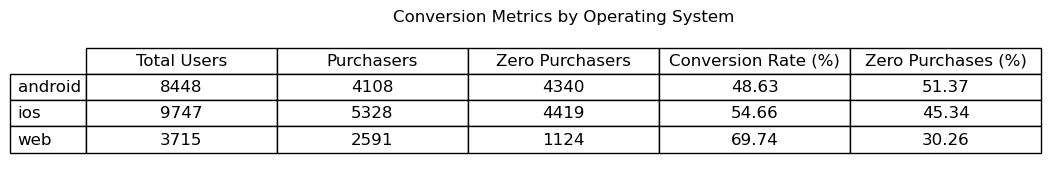

In [4]:
import pandas as pd
from parsing import sliceByCountry
from conversionOs import conversionRate, conversionByOs

df = pd.read_csv('dataset_for_datascience_assignment.csv')
# df = sliceByCountry(df)
# conversionRate(df)

# Uncomment the line below for bigger, higher contrast table
conversionByOs(df)

## *Time-to-First-Purchase Analysis*

Web platform users demonstrate significantly accelerated purchase initiation compared to mobile platform cohorts. Temporal analysis reveals a substantial advantage in early conversion for web users across all measured intervals.

My methodology employed discrete temporal segmentation based on the differential between registration date and initial purchase date, with same-day transactions represented by a zero-day differential. This approach provides granular visibility into conversion velocity across platforms.

The data reveals that 76.54% of web platform users complete a transaction on their registration day, representing immediate conversion. This stands in marked contrast to iOS and Android users, who demonstrate same-day purchases of 42.87% and 33.41% respectively.

In [5]:
from firstPurchase import firstPurchase, filterFirstPurchase, createBuckets

# plot users OS by country
df = parseDf()

# choose country
country = "ALL"

# insert new column `DAYS_TO_FIRST_PURCHASE`
newDfAddedColumn: pd.DataFrame = filterFirstPurchase(df)

# filter by selected country. This dataframe will still contain 
# most of the original columns
if country != "ALL":
	filteredDf = newDfAddedColumn[newDfAddedColumn['REGISTRATION_COUNTRY'] == country]
else:
	filteredDf = newDfAddedColumn.copy()

createBuckets(filteredDf)

# # Uncomment the code below to see a table with high contrast and bigger font
# # Don't forget to comment the code above to avoid confusion

# # plot users OS by country
# df = parseDf()

# # the function below can take two arugments, the second one is the ISO of the three
# # main countries
# firstPurchase(df)
# firstPurchase(df, "DNK")

,web,ios,android
PURCHASE_TIME_BUCKET,,,
Same day,76.54%,42.87%,33.41%
1-7 days,4.72%,9.3%,9.2%
8-14 days,1.75%,3.88%,4.16%
15-30 days,2.59%,5.96%,4.45%
31-60 days,2.3%,6.3%,5.1%
61-90 days,1.67%,5.28%,3.87%
91-180 days,3.76%,9.43%,10.2%
181-365 days,5.47%,14.2%,24.03%
365+ days,1.21%,2.79%,5.57%


## *What About Single-Time Purchases?*

This is a fair question. One might expect single purchases to be common for web users—imagine Linda ordering pizza for an office party through the website rather than downloading an app she will rarely use. However, the data does not support this assumption, keeping such scenarios merely anecdotal.

The following data will mention active period, which is the difference between the day of first purchase and the day of last purchase. A longer period means higher value of active period.

On the table below we can see that `web` users have quite a gap between them and `iOS` and `Android` users when it comes to single day users. Here, single day users are those who have purchased from Wolt only once. The mean and median active period values also show that `web` platform users take slight more time between purchases than `Android` and `iOS` users. This difference between active period and average days between purchases is exactly the point of my analysis: Wolt could increase it's revenue if it reduces this gap. Notwithstanding, there is also a a considerable percentage of single days users using `web` platform that could be converted to frequent costumers.

In [6]:
from firstAndLast import diffBetweenFirstAndLastPurchase, tableDiffFirstAndLast
from parsing import parseDf

df = parseDf()

diffBetweenFirstAndLastPurchase(df)

# Uncomment below for bigger high contrast table
# tableDiffFirstAndLast(stats)

,web,ios,android
Total Users,2411,2947,1714
Average Days Between Purchases,69.56,59.79,55.11
Mean Active Period,160.94,158.92,156.77
Median Active Period,106.5,122.0,121.0
Single Day Users,36.17%,30.51%,28.12%
Maximum Active Period,426.0,426.0,425.0


## *Relationship between Early Adoption and Purchase*

As data shows, early adoption has a weak correlation (0.10-0.30) to total amount of purchases. Considering that the `web` users take more time in average between purchases and tend to spend more money overall, it would lead us to believe that this group would be spending more money in groceries/retail. However, exploratory analysis showed that their spending habits did not differ from other platforms. This could mean that any change in consumer habits should translate into all store types.

My analysis has found a slight but consistent negative relationship (-0.28 in Denmkar and -0.21 in Finland) between the days until first purchase and overall spending. This correlation is stronger within `web` users in Denmark. This suggests that customers who make their first purchase sooner after registration tend to spend more money overall. While we cannot definitively establish causation, this correlation indicates that strategies aimed at reducing the registration-to-first-purchase interval may potentially increase overall customer spending.

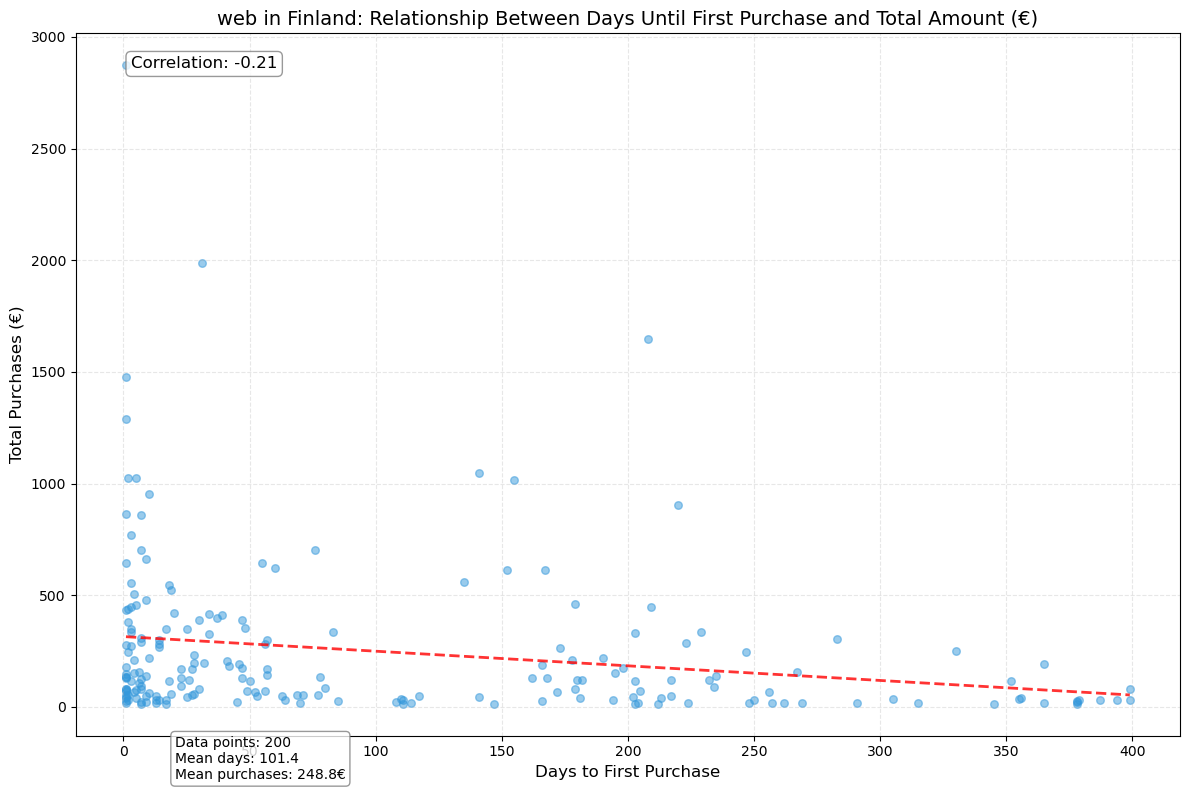

In [7]:
from osSpending import scatterPlotTotalPurchases
from parsing import parseDf

dataframe = parseDf()

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"
country = "FIN"

# Change to None to view all platforms. Options: web, android, ios.
platform = "web"

# If you want to visualize the pattern across OS'
# add the following second argument strings:  android, ios, or web 
# e.g. scatterPlotTotalPurchases(dataframe, "ios")

# scatterPlotTotalPurchases(dataframe)
scatterPlotTotalPurchases(dataframe, platform, country)

## *What Is the Relation between ?*

There is a moderate positive correlation (0.45-0.50) between activity period length and purchase count across all devices. This means users who remain active for longer tend to make more purchases. The correlation is usually slightly stronger for mobile users than for web users.

One could say that this could be the result of a mutual causality, but this relationship is not equally bidirectional. In other words, one can buy more even if he/she shops less, and the amount bought not necessarily affects the shopping frequency. Therefore, this correlation is a solid base to my hypothesis since costumers that are more active are *also* purchasing more.

While frequent activity does not guarantee higher total consumption for every customer, our data indicates that encouraging more frequent purchases does not lead to reduced spending per transaction. This suggests we can pursue strategies to increase purchase frequency without concerning ourselves that customers will divide their existing budget across more purchases.

In [8]:
from firstAndLast import activityPeriodCorrelation
from parsing import parseDf

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"

df = parseDf()
activityPeriodCorrelation(df, country)

Denmark


,Correlation,Mean Active Period (days),Mean Purchases
web,0.52,166.54,6.20
ios,0.53,170.11,6.63
android,0.54,154.29,7.43


## *Revenue from Overall Purchases*

The above data suggested that the more active one is, the more they purchase. However, this begs the question "does more purchases translate into more revenue?". The short answer is *yes*, specially for `web` users in Denmark.

Our analysis found a weak-to-moderate negative correlation between customer activity and both total purchase count (-0.37) and total spending (-0.34). Specifically, customers who remain active for longer periods tend to make more purchases and spend more overall. While correlation doesn't prove causation, these consistent relationships suggest that strategies focused on extending customer engagement periods may positively impact both purchase frequency and revenue.

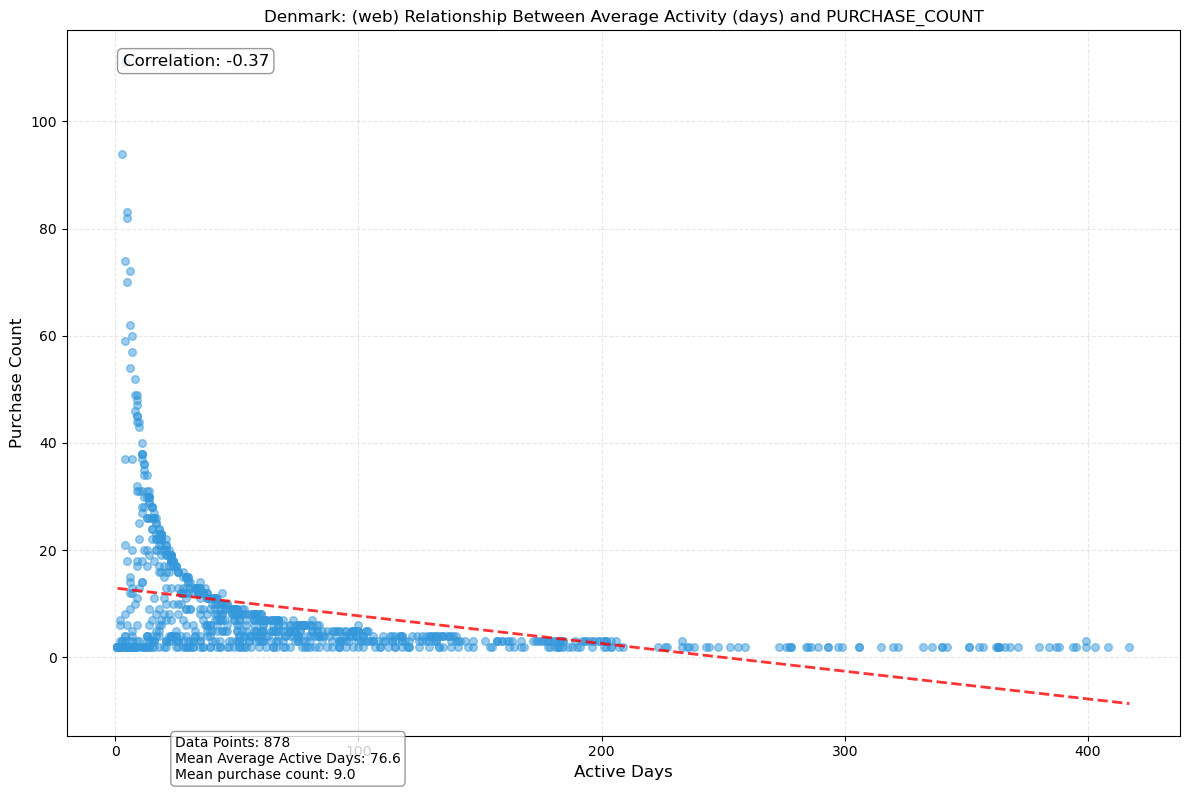

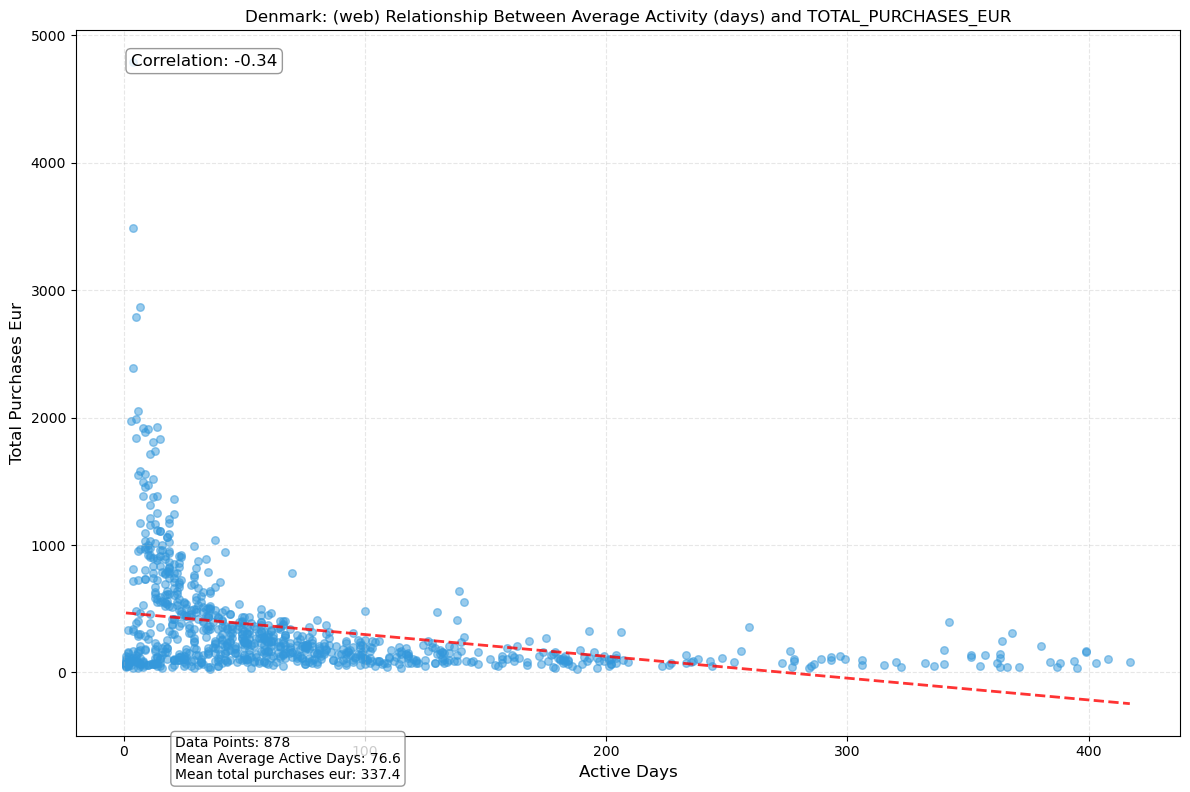

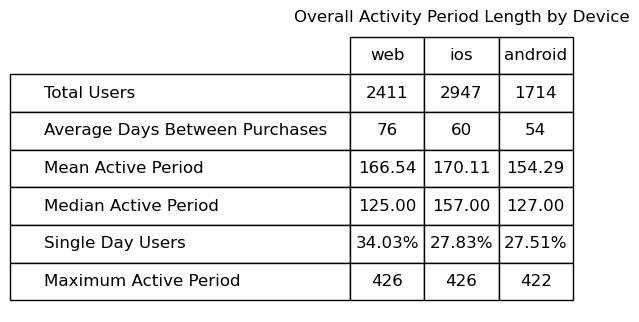

In [9]:
from firstAndLast import scatterPlotActivityPeriod
from parsing import parseDf

df = parseDf()

# Change to None to view all countries. Options: DNK, FIN, GRC.
country = "DNK"

# Change to None to view all platforms. Options: web, android, ios.
platform = "web"

scatterPlotActivityPeriod(df, 'PURCHASE_COUNT', country, platform)
scatterPlotActivityPeriod(df, 'TOTAL_PURCHASES_EUR', country, platform)
statsDf = diffBetweenFirstAndLastPurchase(df, country)
tableDiffFirstAndLast(statsDf)

# you can view all platforms and all countries by uncommenting the function below
# scatterPlotActivityPeriod(df, 'PURCHASE_COUNT')


## *Web Users Purchasing Times*

Purchasing patterns differ from country to country:

| Country | Peak hours |
| ------- | ---------- |
| Denmark | 06.00, 17.00, 22.00|
| Finland | 14.00, 18.00 |
| Greece | 02.00, 08.00, 12.00, 14.00 |

A good starting point would be to target `web` users around these hours when purchases seem more abundant. 

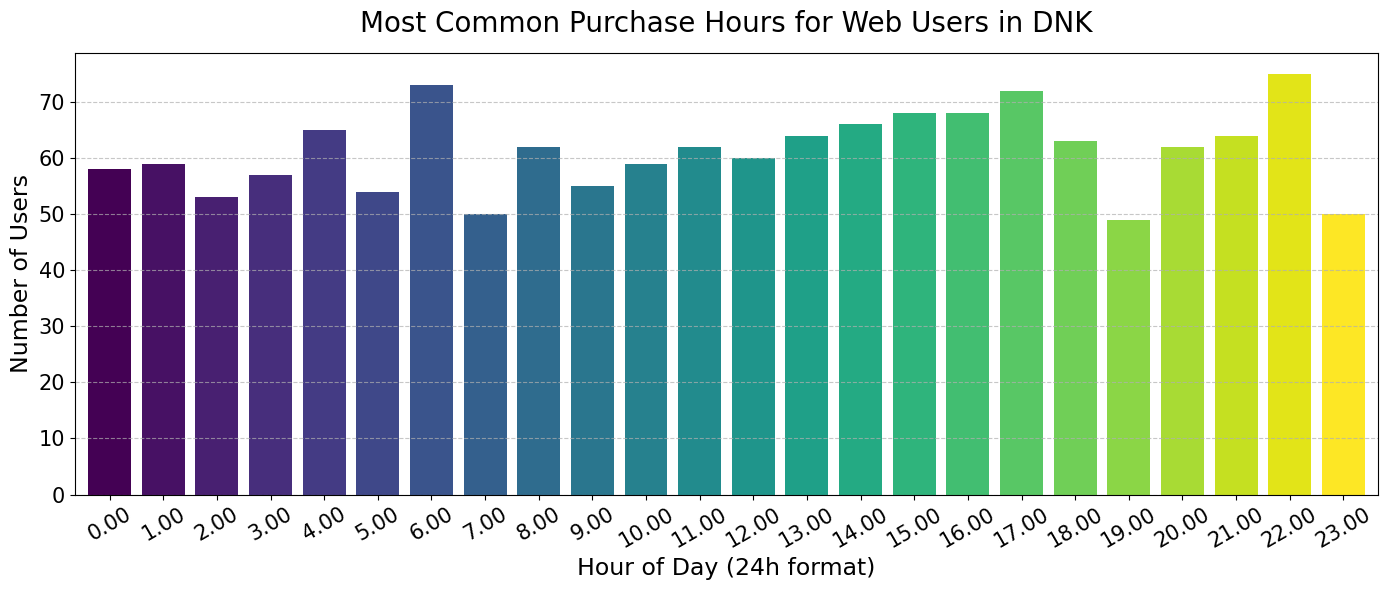

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from parsing import loadCsvData, findPath

# set country ISO. Options: DNK, FIN, GRC
# country = "FIN"
country = "DNK"
# country = "GRC"

# set platform. Options: android, iOS, web
platform = "web"

# load dataframe not parsed
df: pd.DataFrame = loadCsvData(findPath())

# copy dataframe
dfCopy = df.copy()

# slice by selected country
dfCopy = dfCopy[dfCopy['REGISTRATION_COUNTRY'] == country]

# slice by platform
dfCopy = dfCopy[dfCopy['PREFERRED_DEVICE'] == platform]

# retrieve column with common hour of the day purchase
commonHours = dfCopy['MOST_COMMON_HOUR_OF_THE_DAY_TO_PURCHASE']

# create frequency distribution
hour_counts = commonHours.value_counts().sort_index()

# Make sure we have all hours from 0-23, filling missing values with 0
all_hours = pd.Series(0, index=range(24))
hour_counts = hour_counts.combine_first(all_hours).sort_index()

plt.figure(figsize=(14,6))
hour_counts.plot(kind='bar', width=0.8, color=plt.cm.viridis(np.linspace(0, 1, len(hour_counts))))
plt.title(f'Most Common Purchase Hours for {platform.capitalize()} Users in {country}', fontsize=20, pad=15)
plt.xlabel('Hour of Day (24h format)', fontsize=17)
plt.ylabel('Number of Users', fontsize=17)
plt.xticks(rotation=45, size=15)
# Format x-axis labels with zeros at the end (hour:00)
plt.xticks(range(24), [f'{hour}.00' for hour in range(24)], rotation=30, size=15)
plt.yticks(size=15)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## *Conclusion*

In this report, we analyzed data of purchases in iOS, Android and web platforms in Finland, Denmark and Greece. The data shows that Danes prefer `web` platform and are also faster to make first purchases after registration. While the time span between purchases for web users is slightly longer compared to other platforms.

There is strong indications that suggest that Wolt should be focusing on `web` platform to reduce time between purchases. As far as evidence has suggested, costumers that get their first purchase sooner tend to spend more money overall, therefore Wolt should target this group to get longer-term users.

Another strong indication is that 

## Technical Appendix: Data Processing Pipeline

The following outlines the data preprocessing methodology implemented to ensure analytical integrity. The dataframe df is processed through a series of sequential filtering operations initiated via the `findPath()` function which locates the source CSV, subsequently accessed through `loadCsvData()` for optimized retrieval.

The preprocessing pipeline consists of the following sequential operations:

- `sliceByCountry()`: Executes geographic data segmentation, filtering for the statistically significant markets (FIN, DNK, and GRC) that constitute the majority of our dataset;
- `sliceByValidDevice()`: Implements platform-based filtering logic to isolate ios, android, and web platforms exclusively. This design pattern facilitates forward compatibility for future analytical iterations with minimal refactoring requirements;
- `removeZeroPurchaseCount()`: Applies conditional filtering to eliminate null transactions, removing all records where PURCHASE_COUNT = 0;
- `removeNaTotalPurchase()`: Executes data integrity validation, filtering out NA/NaN values from the TOTAL_PURCHASES_EUR column to prevent statistical distortion;
- `removeZeroTotalPurchase()`: Implements additional numerical validation, excluding zero-value transactions from the TOTAL_PURCHASES_EUR column;
- `parseDf()`: Serves as the primary function entry point, encapsulating the complete preprocessing pipeline and providing a standardized interface for accessing the cleaned dataset throughout the codebase.

In [11]:
import pandas as pd
import os

validDevices = ["ios", "android", "web"]

def findPath():
	"""
	This function returns the directory of the script and csv file
	
	:Returns: 
	filePath
		the path to the `.csv` file
	"""
	directoryPath = os.path.dirname(os.path.abspath(__file__))
	filePath = os.path.join(directoryPath, "dataset_for_datascience_assignment.csv")
	return filePath

def loadCsvData(file_path) -> pd.DataFrame:
	"""
	Storage of csv in a pandas data type for wrangling
	
	:Parameters:
	file_path
		the path to the `.csv` file with our data
	
	:Returns: 
		pd.DataFrame parsed dataframe
	"""
	df: pd.DataFrame = pd.read_csv(file_path)
	return df

def sliceByCountry(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Slice dataframe by selected countries. Considering that FIN, DNK, and GRC
	consist of 97% of the dataset, we will slice only these countries
	
	:Parameters:
	dataframe
		pd.DataFrame
	
	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	countries = ['FIN', 'DNK', 'GRC']
	return df[df['REGISTRATION_COUNTRY'].isin(countries)]

def removeZeroPurchaseCount(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain '0' in the `PURCHASE_COUNT` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['PURCHASE_COUNT'] > 0]

def removeNaTotalPurchase(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain NA/na/NaN in the `TOTAL_PURCHASES_EUR` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[~df['TOTAL_PURCHASES_EUR'].isna()]

def removeZeroTotalPurchase(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to remove rows that contain '0' in the `TOTAL_PURCHASES_EUR` column

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['TOTAL_PURCHASES_EUR'] > 0]

def sliceByValidDevice(df: pd.DataFrame) -> pd.DataFrame:
	"""
	Function to slice off rows that contain other devices that are not
	android, ios, and web.

	:Returns:
	df
		pd.DataFrame parsed dataframe
	"""
	return df[df['PREFERRED_DEVICE'].isin(validDevices)]

def parseDf():
	"""
	Point of entry for parsing dataframe. If one desires to add further parsing,
	one can add `.pipe()` to the return value with the corresponding new function
	removing or adding columns.
	
	:Returns:
	df
		pd.DataFrame completely parsed dataframe
	"""
	return (loadCsvData(findPath())
			.pipe(sliceByCountry)
			.pipe(sliceByValidDevice)
			.pipe(removeZeroPurchaseCount)
			.pipe(removeNaTotalPurchase)
			.pipe(removeZeroTotalPurchase))
